# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.svm import SVR
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_excel('banana_dataset.xlsx')

data

,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,DRY,DESERT,10-20,NORMAL,8.75
1,DRY,DESERT,10-20,SUNNY,10.25
2,DRY,DESERT,10-20,WINDY,9.65
3,DRY,DESERT,10-20,RAINY,0.75
4,DRY,DESERT,20-30,NORMAL,9.85
...,...,...,...,...,...
187,WET,HUMID,30-40,RAINY,0.10
188,WET,HUMID,40-50,NORMAL,5.15
189,WET,HUMID,40-50,SUNNY,6.65
190,WET,HUMID,40-50,WINDY,6.15


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SOIL TYPE          192 non-null    object 
 1   REGION             192 non-null    object 
 2   TEMPERATURE        192 non-null    object 
 3   WEATHER CONDITION  192 non-null    object 
 4   WATER REQUIREMENT  192 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,WATER REQUIREMENT
count,192.000000
mean,5.935599
std,3.653985
min,0.100000
25%,2.937500
50%,6.600000
75%,8.700000
max,13.250000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'WATER REQUIREMENT'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = []
categorical_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

SOIL TYPE : ['DRY' 'HUMID' 'WET']
REGION : ['DESERT' 'HUMID' 'SEMI ARID' 'SEMI HUMID']
TEMPERATURE : ['10-20' '20-30' '30-40' '40-50']
WEATHER CONDITION : ['NORMAL' 'RAINY' 'SUNNY' 'WINDY']


In [12]:
ordinal_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE']
nominal_feature = ['WEATHER CONDITION']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['DRY', 'HUMID', 'WET'], dtype=object),
    np.array(['DESERT', 'SEMI ARID', 'SEMI HUMID', 'HUMID'], dtype=object),
    np.array(['10-20', '20-30', '30-40', '40-50'], dtype=object)
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Traning Set

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = SVR()

## 6.2. Train Model

In [23]:
reg.fit(X_train_scaled, y_train)

SVR()

## 6.3. Model's Weight & Bias

In [24]:
reg.dual_coef_

array([[ 1.        ,  1.        , -1.        , -1.        ,  1.        ,
         0.85211008, -1.        , -0.3760263 , -1.        ,  1.        ,
        -1.        ,  0.24951653, -1.        , -1.        ,  1.        ,
        -1.        ,  1.        , -0.66005161,  1.        , -1.        ,
        -1.        , -0.84718003,  1.        , -1.        ,  1.        ,
        -0.69170724,  0.66431308,  1.        ,  1.        ,  0.51035938,
        -1.        , -1.        ,  1.        , -1.        ,  1.        ,
         0.13946572, -1.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -1.        ,  1.        ,  0.69267456, -0.48478951,
        -1.        ,  0.61907361,  1.        , -0.9163323 , -1.        ,
         0.82520107,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ,  1.        , -1.        ,  1.        , -1.        ,
         0.43198379,  1.        ,  1.        ,  1.        , -1.        ,
         1.        ,  1.        , -1.        , -0.8

In [25]:
reg.intercept_

array([6.1280272])

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train_scaled)

## 7.2. Test Set

In [27]:
y_pred_test = reg.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [28]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9839992570774493
mean_squared_error =		 0.2231366143844055
mean_absolute_error =		 0.31671675267755084
mean_absolute_percentage_error = 0.5326234418044772


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

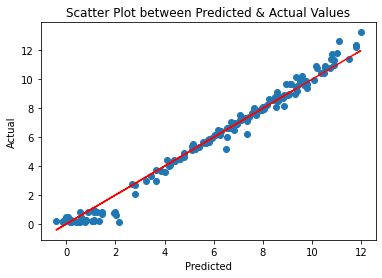

In [29]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.9820720713372779
mean_squared_error =		 0.19045359895625352
mean_absolute_error =		 0.3226223822343951
mean_absolute_percentage_error = 0.4249694665791318


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

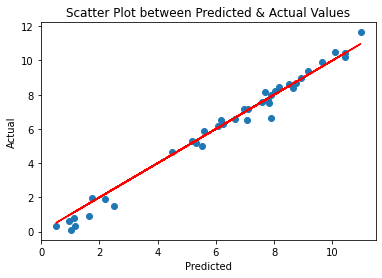

In [31]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [32]:
import pickle

In [33]:
pickle.dump((reg, 
             ordinal_encoder, 
             one_hot_encoder,
             scaler,
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('banana_model.pickle', 'wb'))